In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCI_functions.FCI_functions import calculate_pre_score, calculate_post_score, calculate_question_score_post, calculate_question_score_pre

In [2]:
df16_111 = pd.read_excel('rawdata/2016-17 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df16_112 = pd.read_excel('rawdata/2016-17 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_111 = pd.read_excel('rawdata/2014-15 WT1 Phys 111 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_112 = pd.read_excel('rawdata/2014-15 WT1 Phys 112 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_111 = pd.read_excel('rawdata/2015-16 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_112 = pd.read_excel('rawdata/2015-16 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_111 = pd.read_excel('rawdata/2017-18 WT1 Phys 111 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_112 = pd.read_excel('rawdata/2017-18 WT1 Phys 112 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_111 = pd.read_excel('rawdata/2018-19 WT1 Phys 111 ALL Data - Shared with David (20190530).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_112 = pd.read_excel('rawdata/2018-19 WT1 Phys 112 ALL Data - Shared with David (20190527).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_111 = pd.read_excel('rawdata/2019-20 WT1 Phys 111 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_112 = pd.read_excel('rawdata/2019-20 WT1 Phys 112 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df20 = pd.read_excel('rawdata/2020-21 WT1 Phys 111&112 ALL Data - Shared with Chelsea (20210329).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
is_111 = df20['Course'] == 111
df20_111 = df20[is_111]
is_112 = df20['Course'] == 112
df20_112 = df20[is_112]

In [287]:
def calculate_pre_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1                
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [288]:
def calculate_pre_score_FDM_2020(student):
    corr_ans = [3 , 4, 2 , 3, 2 , 3 , 5, 1, 3 , 4 , 5, 1]
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [289]:
def calculate_post_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [290]:
def calculate_post_score_FDM_2020(student):
    corr_ans = [3 , 4, 2 , 3, 2 , 3 , 5, 1, 3 , 4 , 5, 1]
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [324]:
def FDM(df111, df112):
    df111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=8)
    df111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=8)
    plt.legend(["post", "pre"])
    plt.title("111")
    #plt.xlim(0,7)
    plt.show()
    
    df1 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 PRE")
    df1["111 POST"] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)

    print(df1)

    df112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("112")
    #plt.xlim(0,7)
    plt.show()

    df2 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 PRE")
    df2["112 POST"] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    print(df2)

    is_f111 = df111['PRE Q85']== 'A'
    df_f111 = df111[is_f111]
    
    is_f112 = df112['PRE Q85']== 'A'
    df_f112 = df112[is_f112]

    df_f111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 111")
    plt.show()
    
    df3 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 FEMALE PRE")
    df3["111 FEMALE POST"] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)

    print(df3)
    
    df_f112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 112")
    plt.show()
    
    df4 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 FEMALE PRE")
    df4["112 FEMALE POST"] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    print(df4)

In [325]:
def FDM_2020(df111, df112):
    df111.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df111.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("111")
    #plt.xlim(0,7)
    plt.show()
    
    df1 = df111.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 PRE")
    df1["111 POST"] = df111.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)

    print(df1)

    df112.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df112.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("112")
    #plt.xlim(0,7)
    plt.show()

    df2 = df112.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 PRE")
    df2["112 POST"] = df112.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)
    print(df2)

    is_f111 = df111['PRE Q12']== 1
    df_f111 = df111[is_f111]
    
    is_f112 = df112['PRE Q12']== 1
    df_f112 = df112[is_f112]

    df_f111.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f111.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 111")
    plt.show()
    
    df3 = df111.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 FEMALE PRE")
    df3["111 FEMALE POST"] = df111.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)

    print(df3)
    
    df_f112.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f112.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 112")
    plt.show()
    
    df4 = df112.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 FEMALE PRE")
    df4["112 FEMALE POST"] = df112.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)
    print(df4)

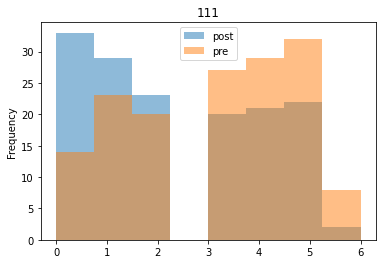

      111 PRE  111 POST
6.0  0.052288  0.013333
0.0  0.091503  0.220000
2.0  0.130719  0.153333
1.0  0.150327  0.193333
3.0  0.176471  0.133333
4.0  0.189542  0.140000
5.0  0.209150  0.146667


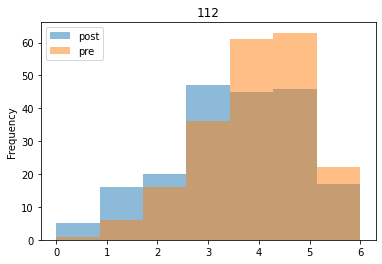

      112 PRE  112 POST
0.0  0.004878  0.025510
1.0  0.029268  0.081633
2.0  0.078049  0.102041
6.0  0.107317  0.086735
3.0  0.175610  0.239796
4.0  0.297561  0.229592
5.0  0.307317  0.234694


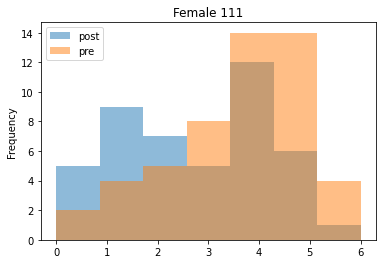

     111 FEMALE PRE  111 FEMALE POST
6.0        0.052288         0.013333
0.0        0.091503         0.220000
2.0        0.130719         0.153333
1.0        0.150327         0.193333
3.0        0.176471         0.133333
4.0        0.189542         0.140000
5.0        0.209150         0.146667


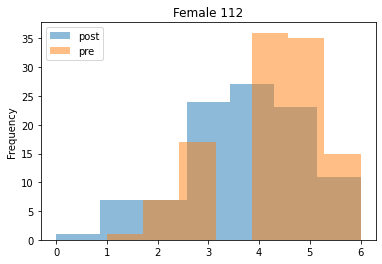

     112 FEMALE PRE  112 FEMALE POST
0.0        0.004878         0.025510
1.0        0.029268         0.081633
2.0        0.078049         0.102041
6.0        0.107317         0.086735
3.0        0.175610         0.239796
4.0        0.297561         0.229592
5.0        0.307317         0.234694


In [326]:
FDM(df14_111, df14_112)

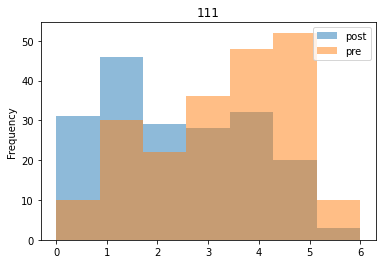

      111 PRE  111 POST
0.0  0.048077  0.164021
6.0  0.048077  0.015873
2.0  0.105769  0.153439
1.0  0.144231  0.243386
3.0  0.173077  0.148148
4.0  0.230769  0.169312
5.0  0.250000  0.105820


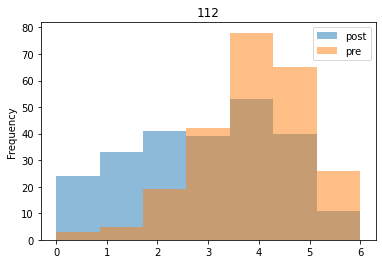

      112 PRE  112 POST
0.0  0.012605  0.099585
1.0  0.021008  0.136929
2.0  0.079832  0.170124
6.0  0.109244  0.045643
3.0  0.176471  0.161826
5.0  0.273109  0.165975
4.0  0.327731  0.219917


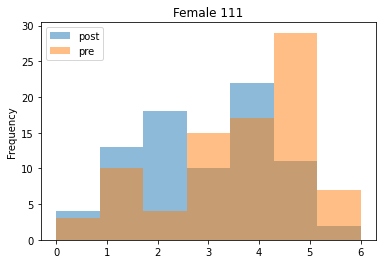

     111 FEMALE PRE  111 FEMALE POST
0.0        0.048077         0.164021
6.0        0.048077         0.015873
2.0        0.105769         0.153439
1.0        0.144231         0.243386
3.0        0.173077         0.148148
4.0        0.230769         0.169312
5.0        0.250000         0.105820


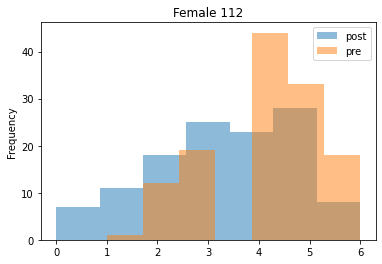

     112 FEMALE PRE  112 FEMALE POST
0.0        0.012605         0.099585
1.0        0.021008         0.136929
2.0        0.079832         0.170124
6.0        0.109244         0.045643
3.0        0.176471         0.161826
5.0        0.273109         0.165975
4.0        0.327731         0.219917


In [317]:
FDM(df15_111, df15_112)

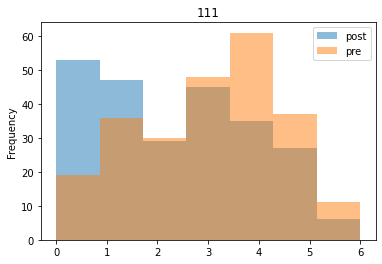

      111 PRE  111 POST
6.0  0.045455  0.024793
0.0  0.078512  0.219008
2.0  0.123967  0.119835
1.0  0.148760  0.194215
5.0  0.152893  0.111570
3.0  0.198347  0.185950
4.0  0.252066  0.144628


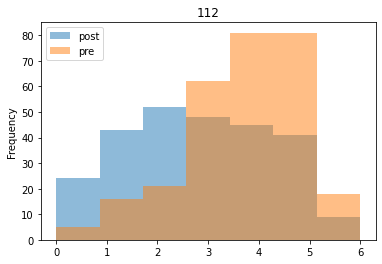

      112 PRE  112 POST
0.0  0.017606  0.091603
1.0  0.056338  0.164122
6.0  0.063380  0.034351
2.0  0.073944  0.198473
3.0  0.218310  0.183206
4.0  0.285211  0.171756
5.0  0.285211  0.156489


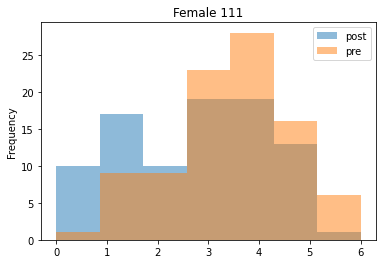

     111 FEMALE PRE  111 FEMALE POST
6.0        0.045455         0.024793
0.0        0.078512         0.219008
2.0        0.123967         0.119835
1.0        0.148760         0.194215
5.0        0.152893         0.111570
3.0        0.198347         0.185950
4.0        0.252066         0.144628


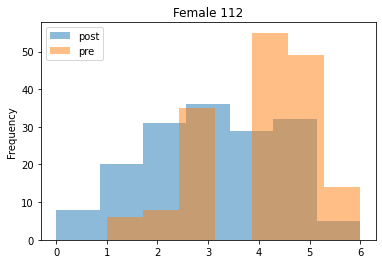

     112 FEMALE PRE  112 FEMALE POST
0.0        0.017606         0.091603
1.0        0.056338         0.164122
6.0        0.063380         0.034351
2.0        0.073944         0.198473
3.0        0.218310         0.183206
4.0        0.285211         0.171756
5.0        0.285211         0.156489


In [318]:
FDM(df16_111, df16_112)

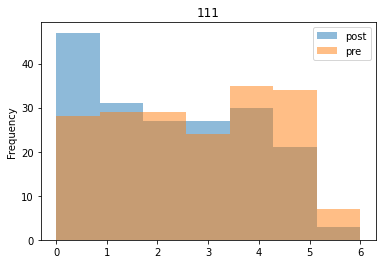

      111 PRE  111 POST
6.0  0.037634  0.016129
3.0  0.129032  0.145161
0.0  0.150538  0.252688
2.0  0.155914  0.145161
1.0  0.155914  0.166667
5.0  0.182796  0.112903
4.0  0.188172  0.161290


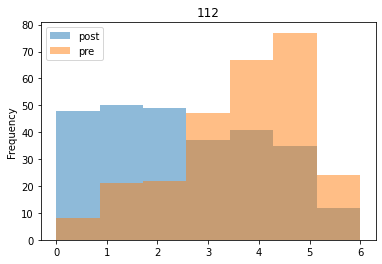

      112 PRE  112 POST
0.0  0.030075  0.176471
1.0  0.078947  0.183824
2.0  0.082707  0.180147
6.0  0.090226  0.044118
3.0  0.176692  0.136029
4.0  0.251880  0.150735
5.0  0.289474  0.128676


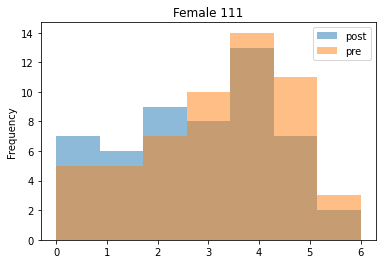

     111 FEMALE PRE  111 FEMALE POST
6.0        0.037634         0.016129
3.0        0.129032         0.145161
0.0        0.150538         0.252688
2.0        0.155914         0.145161
1.0        0.155914         0.166667
5.0        0.182796         0.112903
4.0        0.188172         0.161290


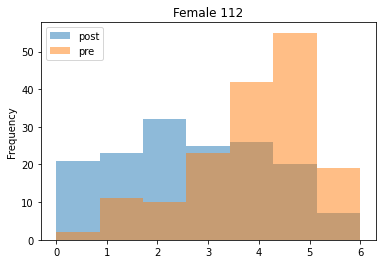

     112 FEMALE PRE  112 FEMALE POST
0.0        0.030075         0.176471
1.0        0.078947         0.183824
2.0        0.082707         0.180147
6.0        0.090226         0.044118
3.0        0.176692         0.136029
4.0        0.251880         0.150735
5.0        0.289474         0.128676


In [319]:
FDM(df17_111, df17_112)

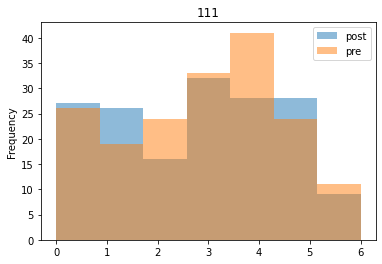

      111 PRE  111 POST
6.0  0.061798  0.054217
1.0  0.106742  0.156627
5.0  0.134831  0.168675
2.0  0.134831  0.096386
0.0  0.146067  0.162651
3.0  0.185393  0.192771
4.0  0.230337  0.168675


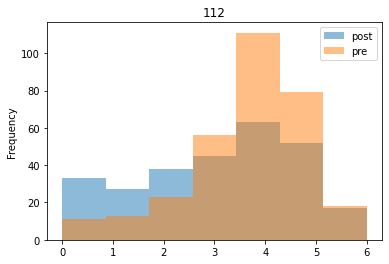

      112 PRE  112 POST
0.0  0.035370  0.120000
1.0  0.041801  0.098182
6.0  0.057878  0.061818
2.0  0.073955  0.138182
3.0  0.180064  0.163636
5.0  0.254019  0.189091
4.0  0.356913  0.229091


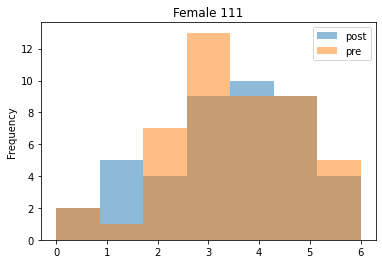

     111 FEMALE PRE  111 FEMALE POST
6.0        0.061798         0.054217
1.0        0.106742         0.156627
5.0        0.134831         0.168675
2.0        0.134831         0.096386
0.0        0.146067         0.162651
3.0        0.185393         0.192771
4.0        0.230337         0.168675


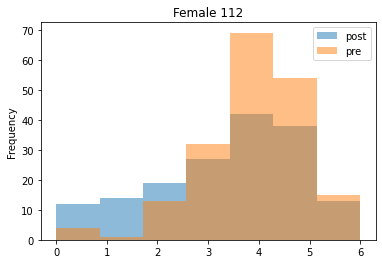

     112 FEMALE PRE  112 FEMALE POST
0.0        0.035370         0.120000
1.0        0.041801         0.098182
6.0        0.057878         0.061818
2.0        0.073955         0.138182
3.0        0.180064         0.163636
5.0        0.254019         0.189091
4.0        0.356913         0.229091


In [320]:
FDM(df18_111, df18_112)

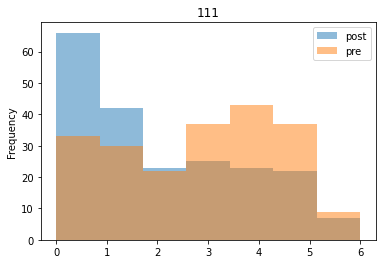

      111 PRE  111 POST
6.0  0.042654  0.033654
2.0  0.104265  0.110577
1.0  0.142180  0.201923
0.0  0.156398  0.317308
5.0  0.175355  0.105769
3.0  0.175355  0.120192
4.0  0.203791  0.110577


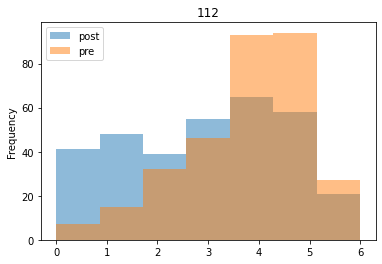

      112 PRE  112 POST
0.0  0.022293  0.125382
1.0  0.047771  0.146789
6.0  0.085987  0.064220
2.0  0.101911  0.119266
3.0  0.146497  0.168196
4.0  0.296178  0.198777
5.0  0.299363  0.177370


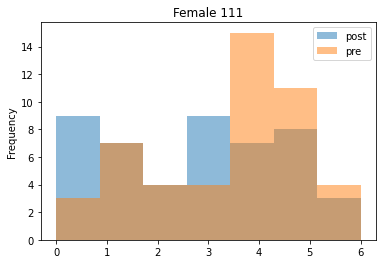

     111 FEMALE PRE  111 FEMALE POST
6.0        0.042654         0.033654
2.0        0.104265         0.110577
1.0        0.142180         0.201923
0.0        0.156398         0.317308
5.0        0.175355         0.105769
3.0        0.175355         0.120192
4.0        0.203791         0.110577


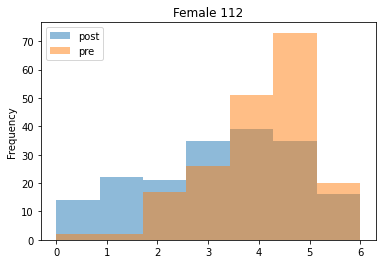

     112 FEMALE PRE  112 FEMALE POST
0.0        0.022293         0.125382
1.0        0.047771         0.146789
6.0        0.085987         0.064220
2.0        0.101911         0.119266
3.0        0.146497         0.168196
4.0        0.296178         0.198777
5.0        0.299363         0.177370


In [321]:
FDM(df19_111, df19_112)

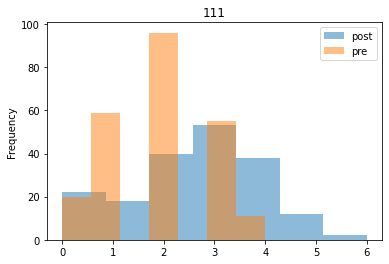

      111 PRE  111 POST
4.0  0.045643  0.205405
0.0  0.082988  0.118919
3.0  0.228216  0.286486
1.0  0.244813  0.097297
2.0  0.398340  0.216216


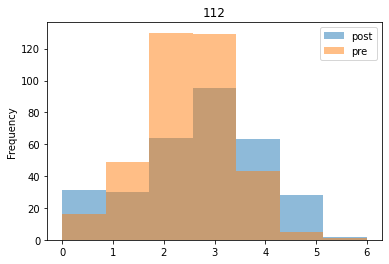

      112 PRE  112 POST
6.0  0.002681  0.006390
5.0  0.013405  0.089457
0.0  0.042895  0.099042
4.0  0.115282  0.201278
1.0  0.131367  0.095847
3.0  0.345845  0.303514
2.0  0.348525  0.204473


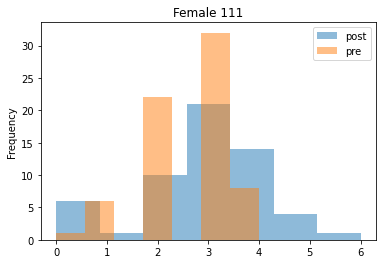

     111 FEMALE PRE  111 FEMALE POST
4.0        0.045643         0.205405
0.0        0.082988         0.118919
3.0        0.228216         0.286486
1.0        0.244813         0.097297
2.0        0.398340         0.216216


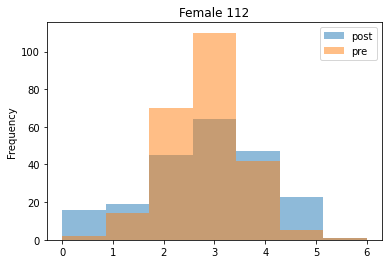

     112 FEMALE PRE  112 FEMALE POST
6.0        0.002681         0.006390
5.0        0.013405         0.089457
0.0        0.042895         0.099042
4.0        0.115282         0.201278
1.0        0.131367         0.095847
3.0        0.345845         0.303514
2.0        0.348525         0.204473


In [322]:
FDM_2020(df20_111, df20_112)